## Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [36]:
# imports
import numpy as np
import pandas as pd
from glob import glob
import cv2
import os
import matplotlib.pyplot as plt


In [3]:
# output files
TRAINING_LOG_FILE = "training_log.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
MODEL_PLOT_FILE = "model_plot.png"
MODEL_FILE = "model.h5"
TRAINING_PLOT_FILE = "training.png"
VALIDATION_PLOT_FILE = "validation.png"
ROC_PLOT_FILE = "roc.png"
KAGGLE_SUBMISSION_FILE = "kaggle_submission.csv"


In [4]:
# hyperparams
SAMPLE_COUNT = 85000
TRAINING_RATION = 0.9
IMAGE_SIZE = 96
EPOCHS = 10
BATCH_SIZE = 192
VERBOSITY = 1
TESTING_BATCH_SIZE = 5000

## Data Path

In [5]:
# data
PATH = '/datadrive/kaggle/histopathologic-cancer-detection'

In [6]:
!ls {PATH}

sample_submission.csv  test  train  train_labels.csv


## Firt look at images

In [ ]:
def read_image(image_path):
    img = cv2.imread(image_path)
    b, g, r = cv2.split(img)
    rgb_img = cv2.merge([r, g, b])
    return rgb_img
    

In [10]:
def show_images(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])    

In [11]:
os.listdir(PATH)

['train_labels.csv', 'sample_submission.csv', 'train', 'test']

In [12]:
files = os.listdir(f'{PATH}/train')[:5]
files

['a95ea23090dcb0a7312d4b40fa5010d8dc036fb9.tif',
 'ea3ccd8a2683c430f16b4312d88f224de43b32af.tif',
 'b63063ea80fde7d031897dfdc5c9c0875fb6754e.tif',
 'eeb68d1d4d7a6ee645255e977e490474baa7cbb2.tif',
 '56630998afbee0db5acce3686b2f448e818f83bd.tif']

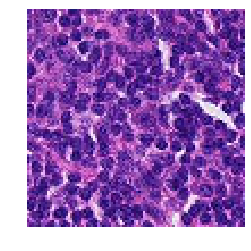

In [20]:
img = plt.imread(f'{PATH}/train/{files[0]}')
show_images([img], figsize=(8, 4))

In [25]:
print('Image resolution:', img.shape)

Image resolution: (96, 96, 3)


In [35]:
#print(f'{PATH}/train_labels.csv')
data_labels = pd.read_csv(f'{PATH}/train_labels.csv', engine='python')
data_labels.describe()

,label
count,220025.000000
mean,0.405031
std,0.490899
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## Our first model: Quick start